In [ ]:
"""Dataset Info"""

"""
Name of dataset: College Basketball Dataset

Dataset link: https://www.kaggle.com/datasets/andrewsundberg/college-basketball-dataset?resource=download

License: CC0: Public Domain

Size: 40.8 kB

"""

In [ ]:
"""
Characteristics of this dataset:

Data is from the 2024 Division I college basketball seasons. cbb24 contains data as of 3/18/2024. There are 362 rows and 23 columns in this data. The "TEAM" and "CONF" are object; "RK", "G", and "W" are integer; the rest of the data are floating point.

"""
"""
Variables:

RK: The ranking of the team at the end of the regular season

TEAM: The Division I college basketball school

CONF: The Athletic Conference in which the school participates in (A10 = Atlantic 10, ACC = Atlantic Coast Conference, AE = America East, Amer = American, ASun = ASUN, B10 = Big Ten, B12 = Big 12, BE = Big East, BSky = Big Sky, BSth = Big South, BW = Big West, CAA = Colonial Athletic Association, CUSA = Conference USA, Horz = Horizon League, Ivy = Ivy League, MAAC = Metro Atlantic Athletic Conference, MAC = Mid-American Conference, MEAC = Mid-Eastern Athletic Conference, MVC = Missouri Valley Conference, MWC = Mountain West, NEC = Northeast Conference, OVC = Ohio Valley Conference, P12 = Pac-12, Pat = Patriot League, SB = Sun Belt, SC = Southern Conference, SEC = South Eastern Conference, Slnd = Southland Conference, Sum = Summit League, SWAC = Southwestern Athletic Conference, WAC = Western Athletic Conference, WCC = West Coast Conference)

G: Number of games played

W: Number of games won

ADJOE: Adjusted Offensive Efficiency (An estimate of the offensive efficiency (points scored per 100 possessions) a team would have against the average Division I defense)

ADJDE: Adjusted Defensive Efficiency (An estimate of the defensive efficiency (points allowed per 100 possessions) a team would have against the average Division I offense)

BARTHAG: Power Rating (Chance of beating an average Division I team)

EFG%: Effective Field Goal Percentage Shot

EFGD%: Effective Field Goal Percentage Allowed

TOR: Turnover Percentage Allowed (Turnover Rate)

TORD: Turnover Percentage Committed (Steal Rate)

ORB: Offensive Rebound Rate

DRB: Offensive Rebound Rate Allowed

FTR : Free Throw Rate (How often the given team shoots Free Throws)

FTRD: Free Throw Rate Allowed

2P_O: Two-Point Shooting Percentage

2P_D: Two-Point Shooting Percentage Allowed

3P_O: Three-Point Shooting Percentage

3P_D: Three-Point Shooting Percentage Allowed

ADJ_T: Adjusted Tempo (An estimate of the tempo (possessions per 40 minutes) a team would have against the team that wants to play at an average Division I tempo)

WAB: Wins Above Bubble (The bubble refers to the cut off between making the NCAA March Madness Tournament and not making it)

SEED: Seed in the NCAA March Madness Tournament

"""

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from pandas.plotting import parallel_coordinates

In [42]:
# Load Data
df = pd.read_csv(r"Downloads/cbb24.csv")

In [60]:
df

,RK,TEAM,CONF,G,W,ADJOE,ADJDE,BARTHAG,EFG%,EFGD%,...,DRB,FTR,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,SEED
0,1,Houston,B12,34,30,119.2,85.5,0.9785,49.7,44.0,...,30.2,29.9,39.0,48.4,43.4,34.7,30.0,63.3,10.6,1.0
1,2,Connecticut,BE,34,31,127.1,93.6,0.9712,57.1,45.1,...,26.8,33.3,32.5,58.5,43.7,36.7,31.9,64.6,11.3,1.0
2,3,Purdue,B10,33,29,126.2,94.7,0.9644,56.0,47.7,...,24.7,42.8,23.0,53.2,48.1,40.8,31.4,67.6,11.0,1.0
3,4,Iowa St.,B12,34,27,113.6,86.5,0.9583,51.9,47.1,...,29.4,36.1,35.2,51.7,46.9,34.9,31.5,67.6,6.9,2.0
4,5,Auburn,SEC,34,27,120.7,92.1,0.9573,54.1,43.4,...,30.3,38.2,41.0,54.9,42.8,35.2,29.8,69.8,5.5,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
357,358,Stonehill,NEC,30,4,90.3,114.2,0.0629,46.7,52.7,...,31.0,22.6,29.4,47.9,51.7,30.1,35.9,68.1,-22.0,NaN
358,359,St. Francis PA,NEC,28,8,93.1,118.1,0.0608,47.2,53.0,...,31.3,32.6,35.4,45.7,52.9,33.2,35.4,65.4,-18.6,NaN
359,360,IUPUI,Horz,29,6,92.1,116.9,0.0607,46.5,58.2,...,35.5,33.2,33.4,49.5,59.0,24.7,38.0,67.3,-21.6,NaN
360,361,Coppin St.,MEAC,29,2,85.1,111.1,0.0445,42.1,51.3,...,38.6,31.1,38.3,41.9,51.0,28.3,34.5,66.3,-22.9,NaN


In [44]:
# Checking column names
df.columns

Index(['RK', 'TEAM', 'CONF', 'G', 'W', 'ADJOE', 'ADJDE', 'BARTHAG', 'EFG%',
       'EFGD%', 'TOR', 'TORD', 'ORB', 'DRB', 'FTR', 'FTRD', '2P_O', '2P_D',
       '3P_O', '3P_D', 'ADJ_T', 'WAB', 'SEED'],
      dtype='object')

In [53]:
### Hierarchical Clustering Dendrogram for College Basketball Teams

In [54]:
# Normalize the data
scaler = StandardScaler()
df2 = scaler.fit_transform(df[['ADJOE', 'ADJDE', 'BARTHAG', 'EFG%', 'EFGD%', 'TOR', 'TORD', 'ORB', 'DRB', 'FTR', 'FTRD', '2P_O', '2P_D', '3P_O', '3P_D', 'ADJ_T', 'WAB']])

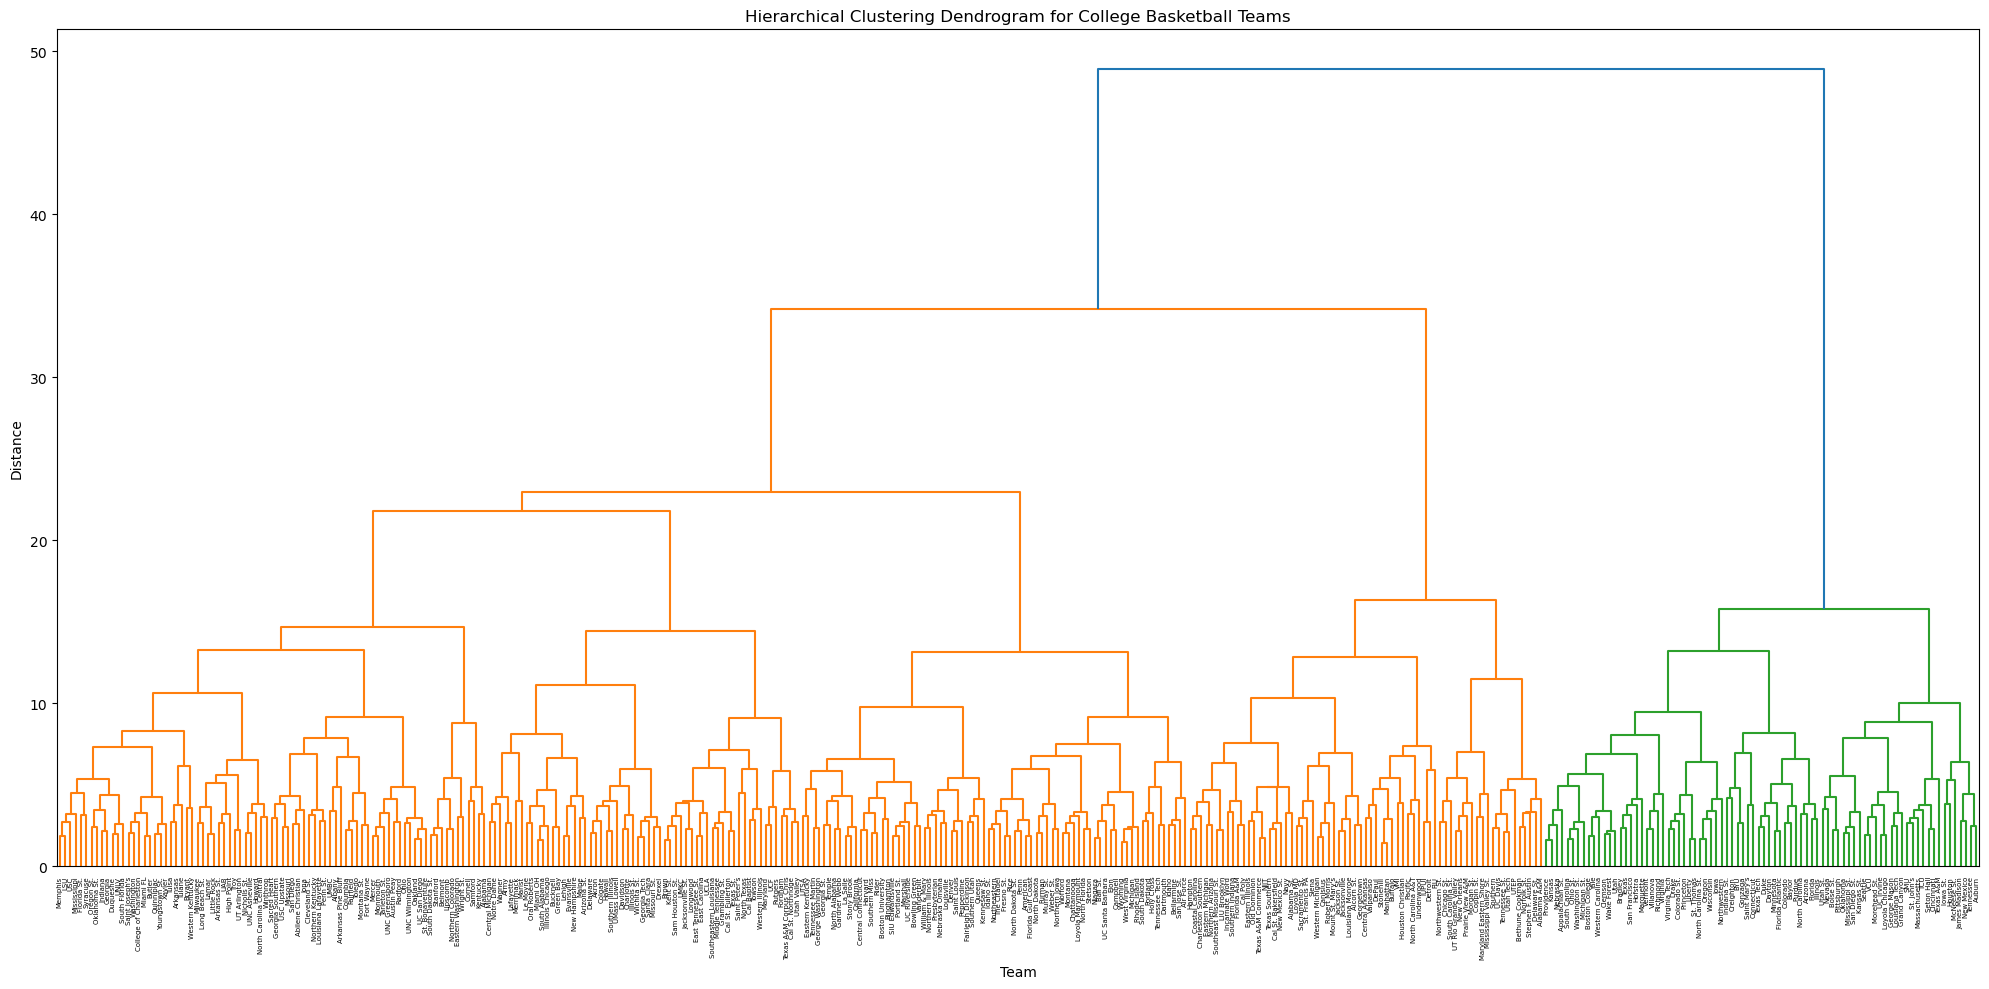

In [55]:
# Hierarchical clustering
linked = linkage(df2, method='ward')

# Plot as a dendrogram
plt.figure(figsize=(20, 10))
dendrogram(linked,
           orientation='top',
           labels=df['TEAM'].values,
           distance_sort='descending',
           show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram for College Basketball Teams')
plt.xlabel('Team')
plt.ylabel('Distance')
plt.xticks(rotation=90)
plt.tight_layout()

plt.show()

In [56]:
### Parallel Coordinates Plot for Top 20 Teams

In [57]:
# Select top 10 teams based on the 'BARTHAG' rating
top_teams = df.nlargest(10, 'BARTHAG')

# Features that I am interested in
features = ['ADJOE', 'ADJDE', 'BARTHAG', 'EFG%', 'TOR', 'ORB', 'DRB', '2P_O', '3P_O', 'ADJ_T', 'WAB']
top_teams['SEED_cat'] = top_teams['SEED'].astype('category')

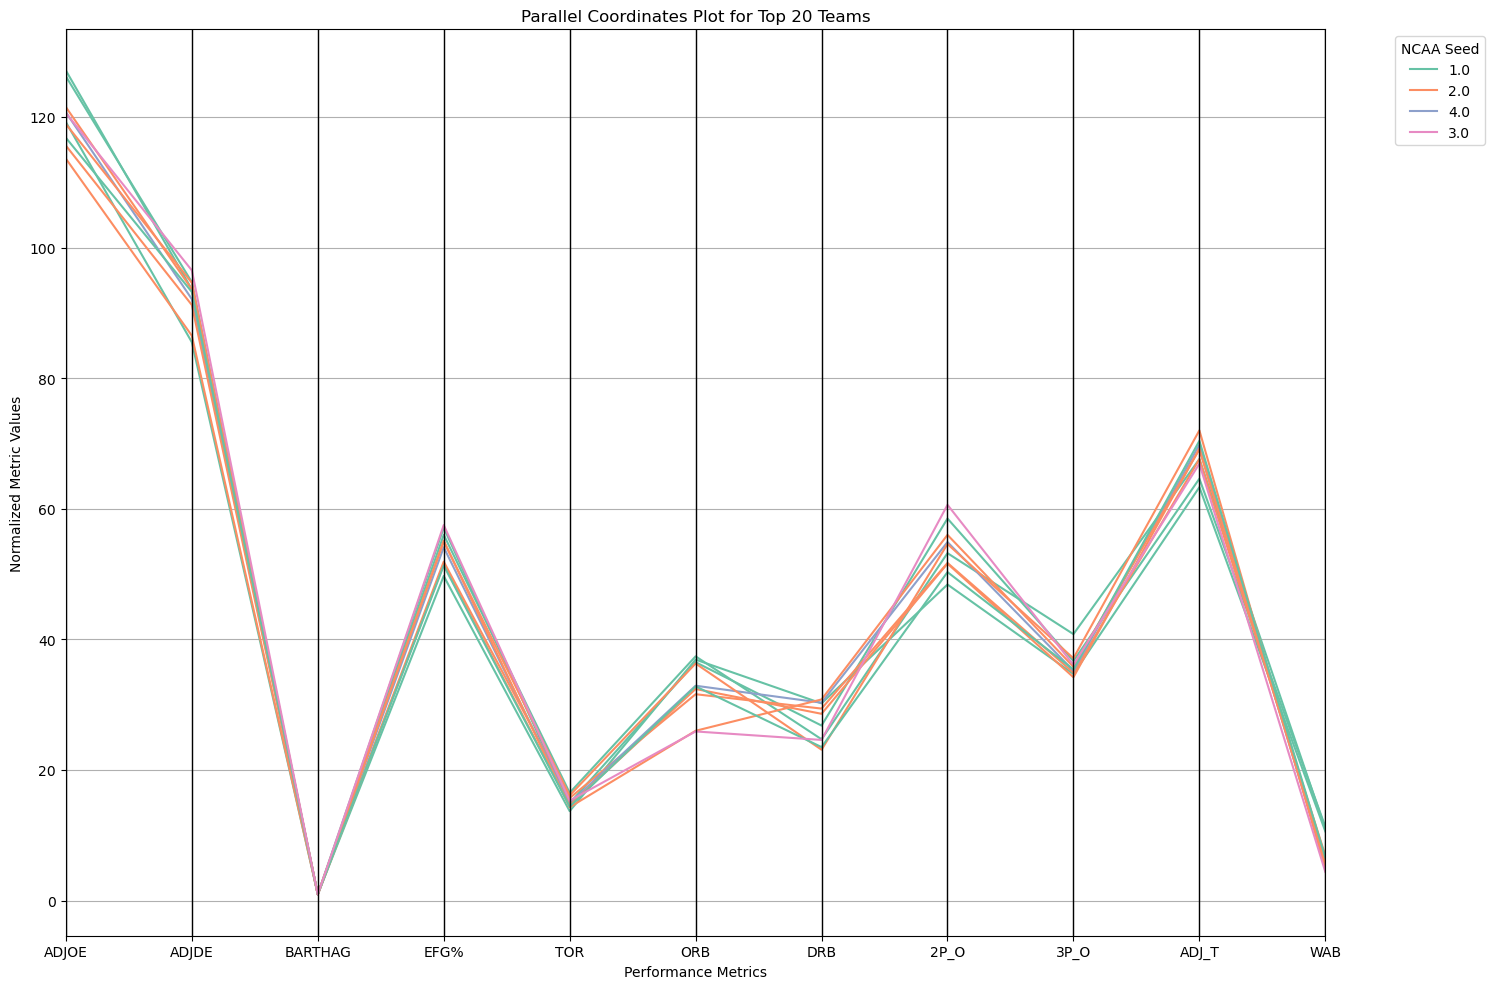

In [58]:
# Plot parallel coordinates chart
plt.figure(figsize=(15, 10))
parallel_coordinates(top_teams, class_column='SEED_cat', cols=features, color=sns.color_palette('Set2', n_colors=len(top_teams['SEED'].unique())))
plt.title('Parallel Coordinates Plot for Top 20 Teams')
plt.xlabel('Performance Metrics')
plt.ylabel('Normalized Metric Values')
plt.legend(title='NCAA Seed', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()

plt.show()

In [59]:
### Scatter Plot Matrix of Key Performance Metrics

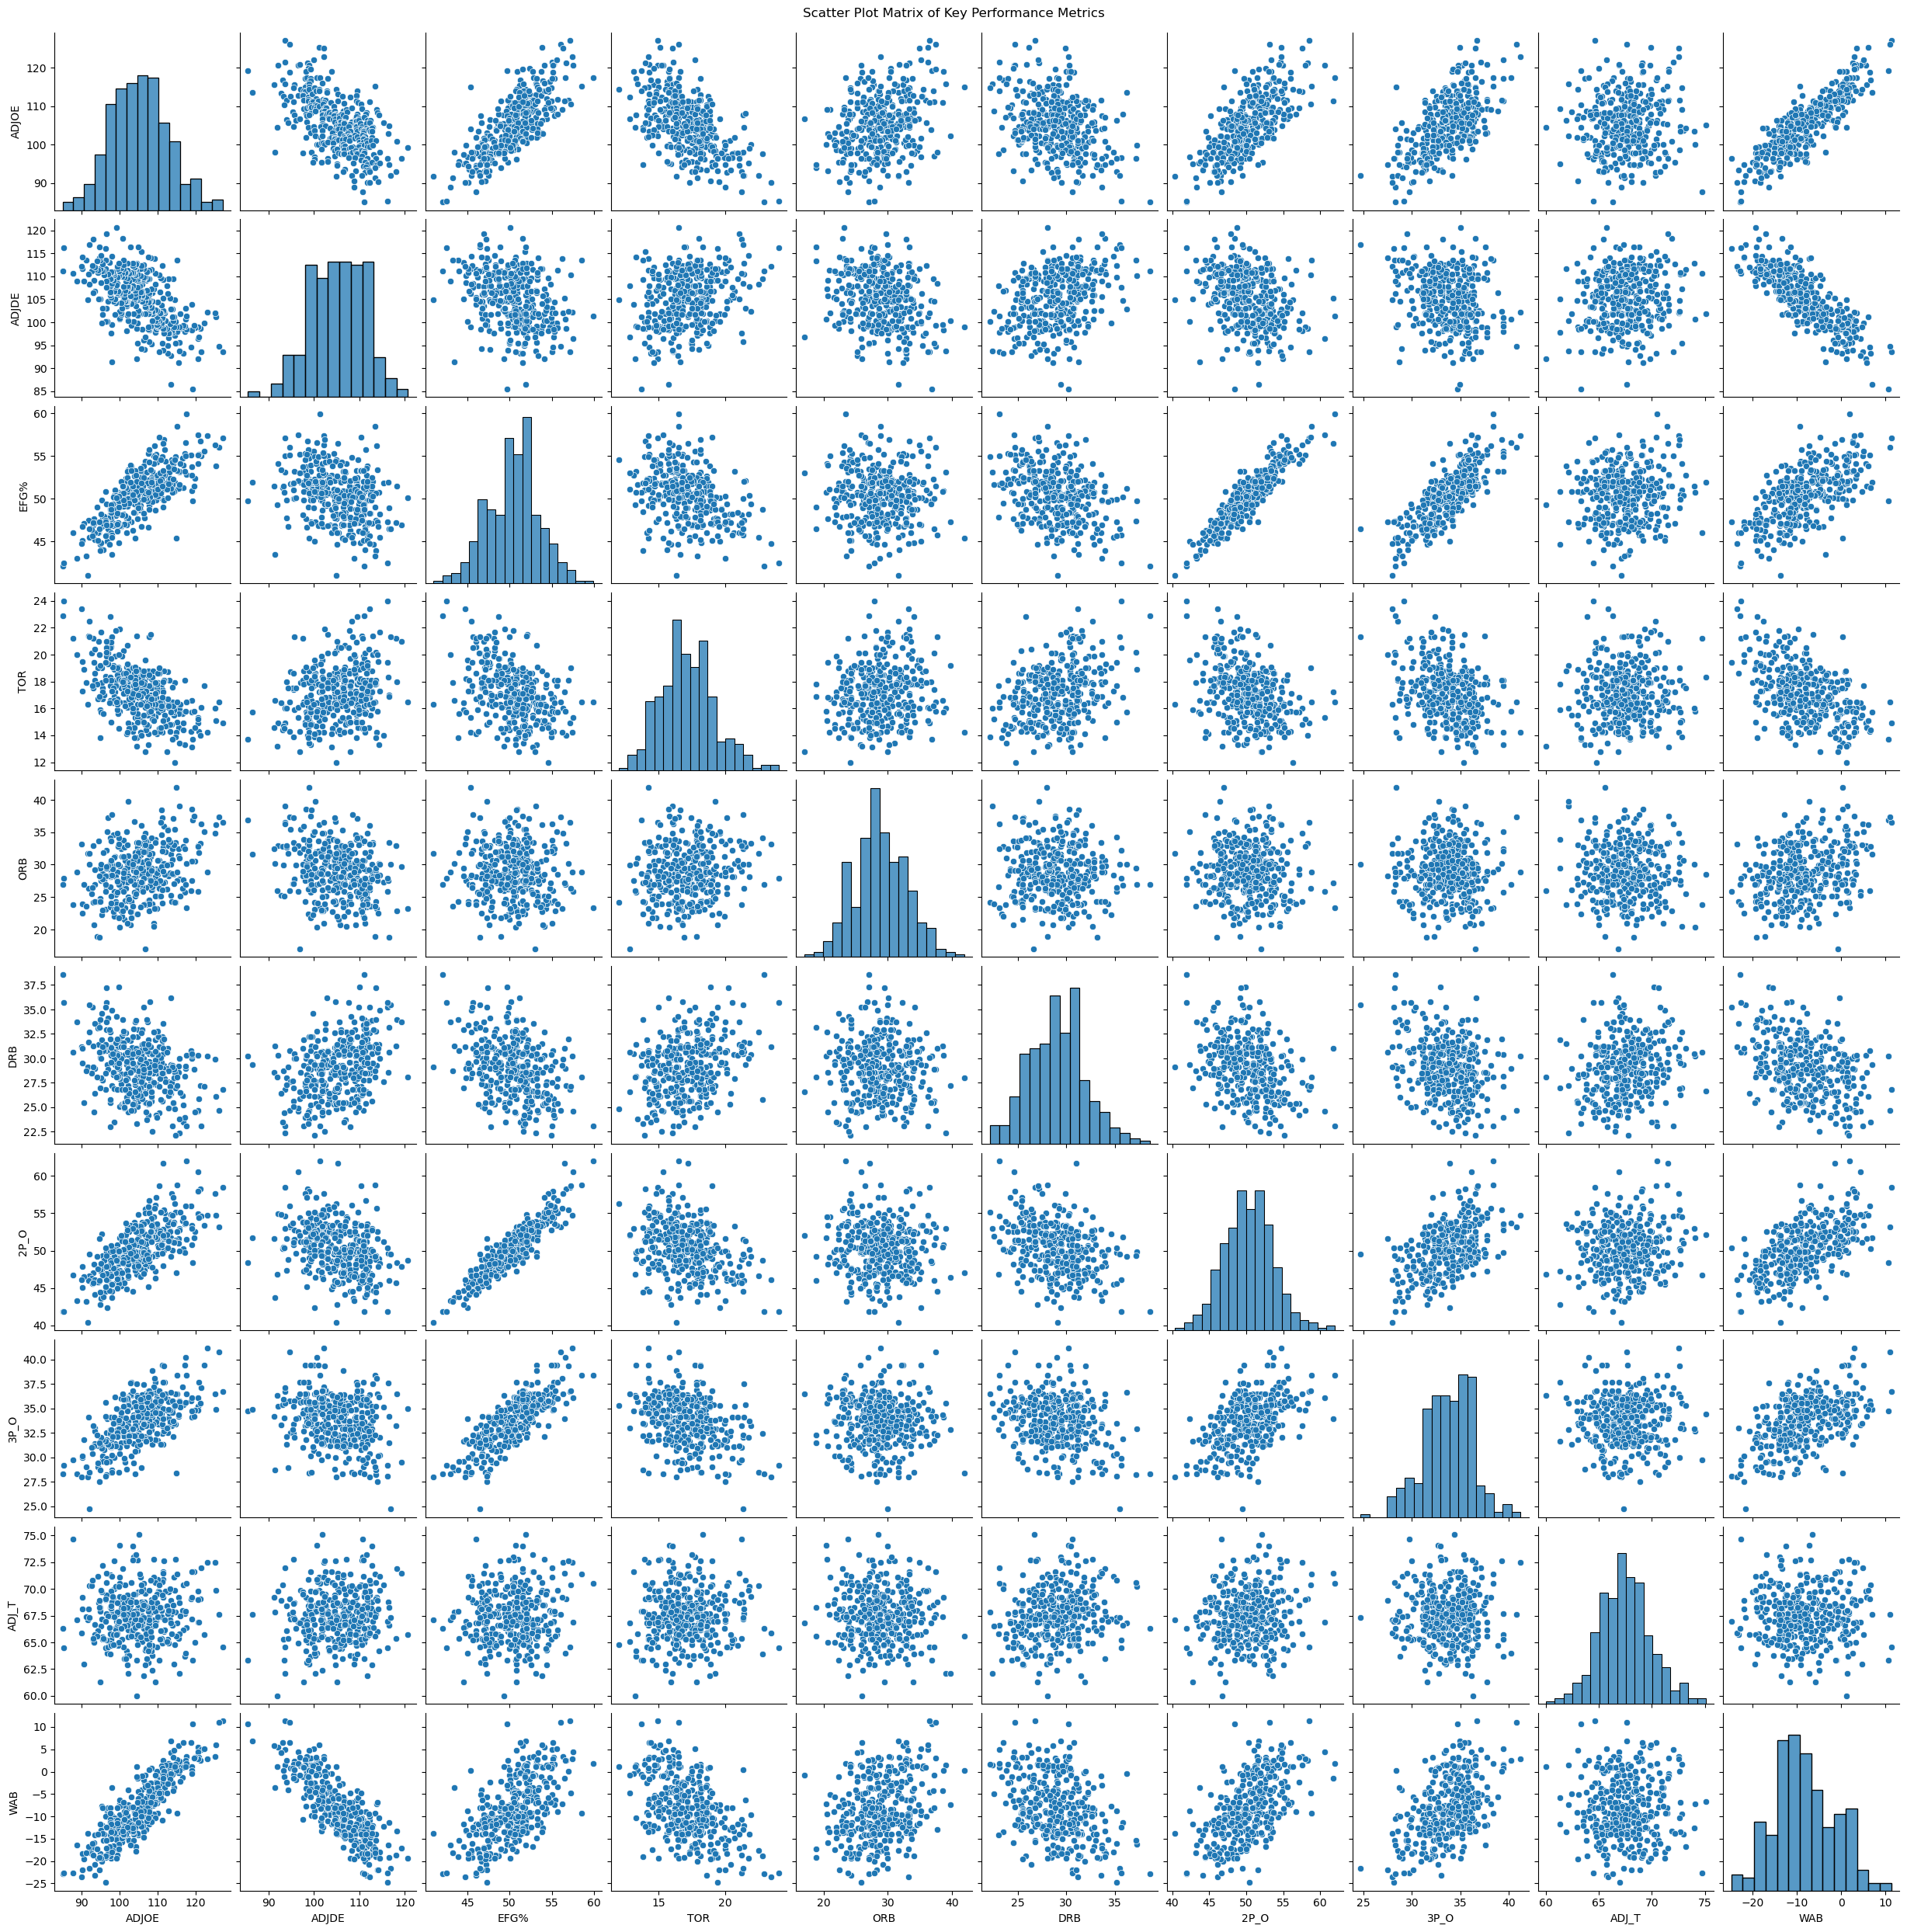

In [52]:
# Selecting parts of data that I am interested in
pairplot_data = df[['ADJOE', 'ADJDE', 'EFG%', 'TOR', 'ORB', 'DRB', '2P_O', '3P_O', 'ADJ_T', 'WAB']]

# Plot pair plot
sns.pairplot(pairplot_data)
plt.suptitle('Scatter Plot Matrix of Key Performance Metrics', y=1.0)

plt.show()